A regressão logísitca é um método de classificação. Tem aplicações das mais variadas como por exemplo:
* Filtro de e-mails (spam ou não)
* Modelos preditores de clientes
* Diagnóstico de doenças

A regressão logística permite resolver problemas de classificação quanto tenta-se predizer categorias  discretas. Por convenção utiliza-se a classificação binária (0 e 1).

A regressão logísitca se comporta melhor para com a teoria da probabilidade uma vez que qualquer valor computado/predito vai estar entre 0 e 1 uma vez que a função logística (também conhecida como sigmóide) so retorna valores entre 0 e 1. 

A expressão logísitica é dada pela seguinte fórmula:

$$  \phi  (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-Z} }  $$ 

Ao analisar a fórmula podemos inferir que é possivel adequar/transformar uma regressão linear em uma regressão logística, dessa forma a fórmula ficaria:

$$  \phi  (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(b_0 + b_1 x)} }  $$ 

Da mesma forma que a regressão linear, antes de iniciar a construção do mesmo os dados devem ser separados em treino e teste e após construído o modelo o mesmo deve ser testado com os dados de teste. No entanto a forma de avaliação difere da regressão linear, para a regressão logística a avaliação é realizad com uma matriz de confusão.

**MATRIZ DE CONFUSÂO**

É uma métrica voltada para modelos de classificação binária que tem como objetivo calcular falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos. 

|   | Valor predito: NÃO | Valor predito: SIM
:--------- | :------: | :-------:
Valor Correto: NÃO | 50 (TN) | 10 FP
Valor Correto: SIM | 5 (FN) | 100 TP

Onde a terminologia básica é:
* TP - True positive
* TN - True negative
* FP - False positive
* FP - False negative

A construção da matriz de confusão proporciona meios de avaliar o modelo sendo as principais métricas:
* Precisão: representa o quanto em média o modelo acerta. Pode ser calculado pelo somatório dos casos verdadeiros dividindo pelo nº de observações:
$$  Precisão =  \frac{\mathrm{TP + TN} }{\mathrm{Nº de Observações} }  $$ 

* Sensibilidade: é a proporção dos casos positivos que foram identificados corretamente.
* Especificidade: é a proporção dos casos negativos que foram identificados corretamente.
* Acurácia: é a proporção de casos que foram corretamente previstos (casos verdadeiros e falsos que foram corretamente previstos (TP e TN))

Ainda, é importante ressaltar sobre a análise dos erros. Quando o modelo acusa um falso positivo têm-se um erro do Tipo I e quando o modelo acusa um falso negativo têm-se um erro do Tipo II

# Imports

In [104]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [49]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Esploration

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


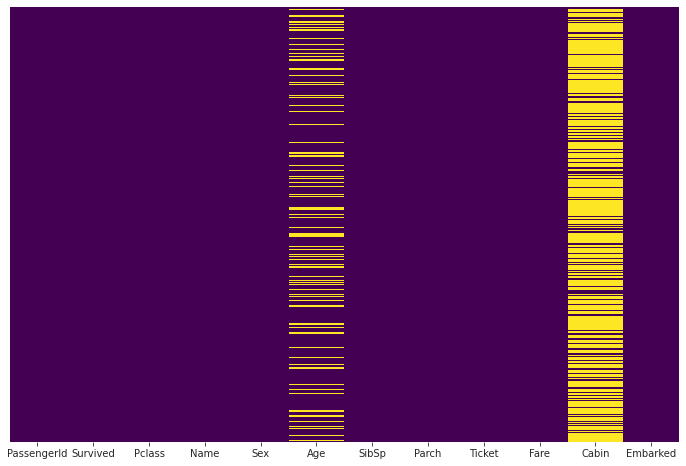

In [51]:
# Checando a densidade dos dados faltantes
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

<AxesSubplot:xlabel='Survived', ylabel='count'>

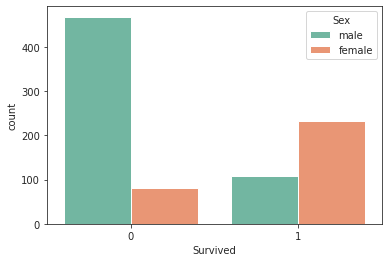

In [52]:
# Verificando o total de sobrevivente e não sobreviventes 
sns.set_style('ticks')
sns.countplot(x='Survived', data=train, hue = 'Sex', palette='Set2')

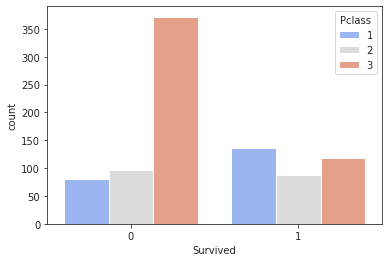

In [53]:
# Verificando sobreviventes e não sobreviventes por classe
sns.countplot(x='Survived', data=train, hue='Pclass', palette='coolwarm');

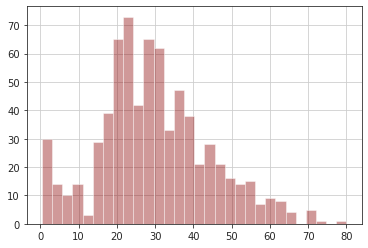

In [54]:
# Distribuição da idade dos passageiros
train['Age'].hist(bins=30, color='darkred', alpha=0.4);

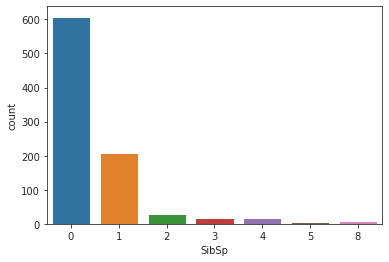

In [55]:
#Densidade do nº de acompanhantes
sns.countplot(x='SibSp', data=train);

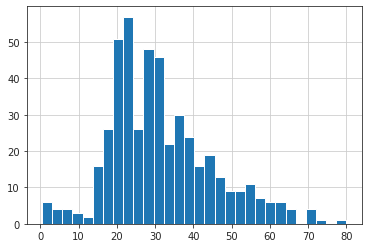

In [56]:
# Distribuição da idade dos passageiros sem acompanhantes
train[train['SibSp'] == 0]['Age'].hist(bins=30);

<AxesSubplot:>

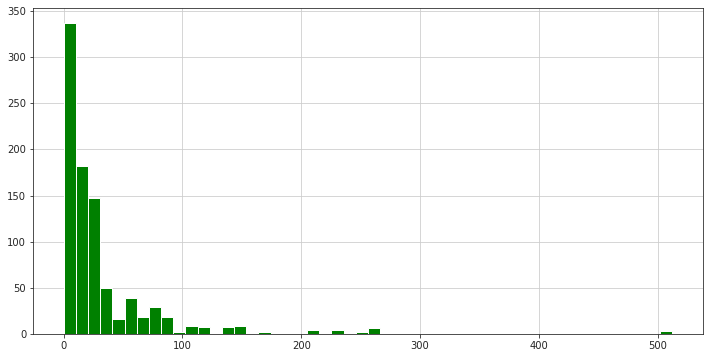

In [57]:
# Valor do ticket
train['Fare'].hist(color = 'green', bins =50, figsize=(12,6))

<AxesSubplot:>

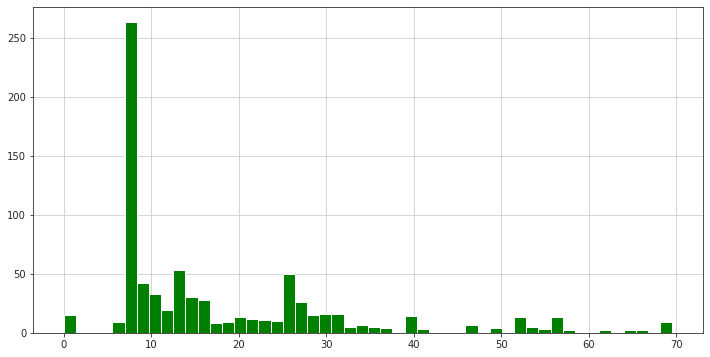

In [58]:
train[train['Fare']< 70]['Fare'].hist(color = 'green', bins =50, figsize=(12,6))

# Data Transformation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

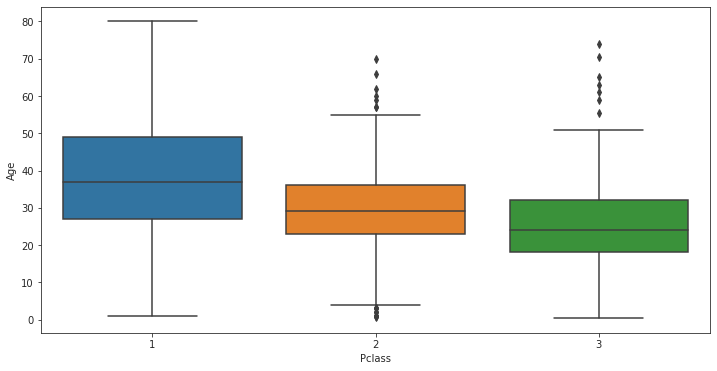

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data = train)

In [60]:
# Tratando os NAs para a variável idade
# A estratégia foi preencher com a idade média da referida classe.

def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [61]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [62]:
# Para a variável 'Cabin', devido a grande quantia de dados faltantes foi decidido remover a variável do modelo

del train['Cabin']
# train.drop('Cabin, inplace = True) ## outra forma de deletar a coluna

In [63]:
# Deletanto o único dado faltante da variável 'Embarked'
train.dropna(inplace = True)

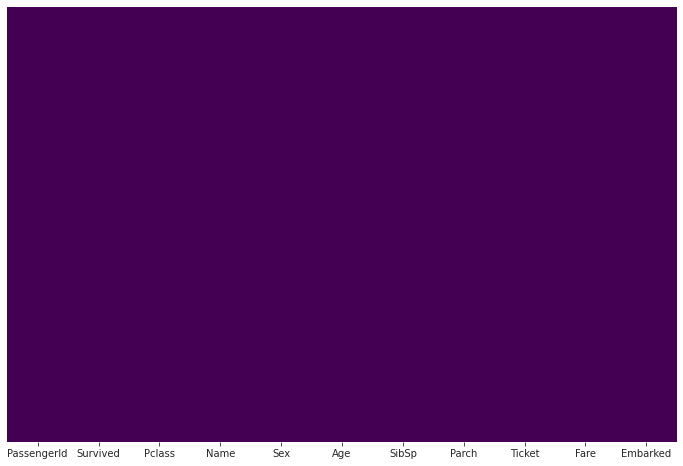

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [65]:
# Transofromação das variáveis categóricas em variáveis binárias.
# foi utilizado o método drop_first para evitar a multicolinearidade uma vez que se a informação é verdadeira para um ela deve ser falsa para outro

sex = pd.get_dummies(train['Sex'], drop_first = True)

In [66]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [68]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Model Construction

In [99]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [100]:
logmodel = LogisticRegression(max_iter=500)

In [101]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [102]:
predictions = logmodel.predict(x_test)

In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.71      0.68      0.69        99

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



In [105]:
print(confusion_matrix(y_test, predictions))

[[141  27]
 [ 32  67]]


# Practice

Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.


In [131]:
ad_data = pd.read_csv('data/advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Data Exploration

In [108]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [110]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


<AxesSubplot:xlabel='Age', ylabel='Count'>

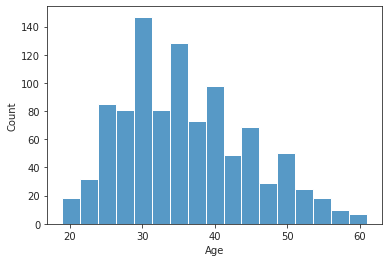

In [111]:
sns.histplot(x='Age', data = ad_data)

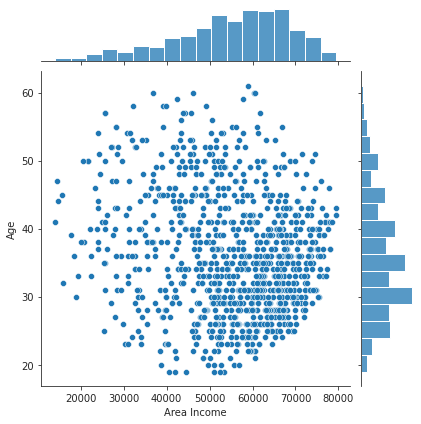

In [112]:
sns.jointplot(x='Area Income', y='Age', data=ad_data)

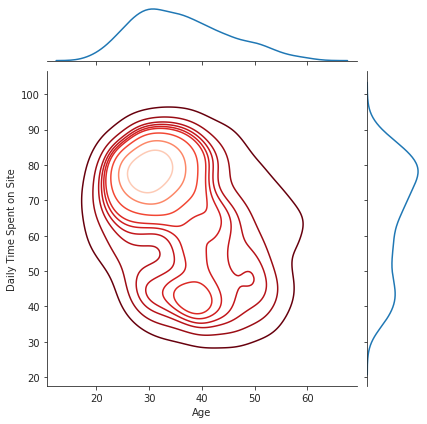

In [120]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', cmap='Reds_r');

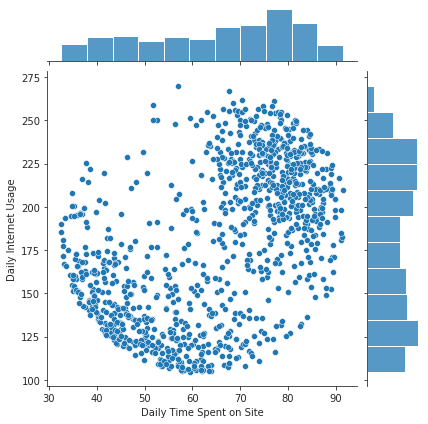

In [122]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, cmap='Reds_r');

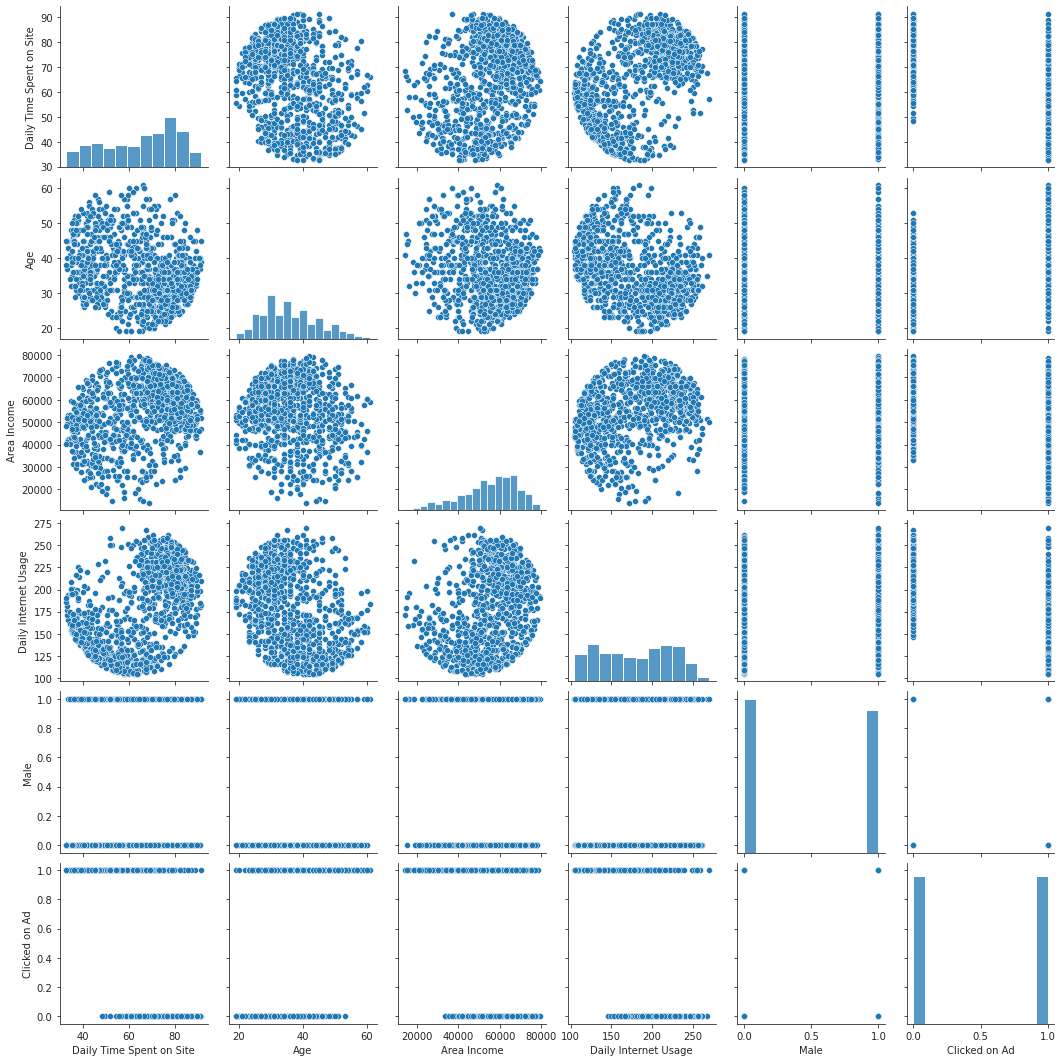

In [123]:
sns.pairplot(ad_data)

In [124]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [132]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1, inplace=True)


In [133]:
x_train, x_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad', axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.3)

In [134]:
logmodel = LogisticRegression()

In [135]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [136]:
predictions = logmodel.predict(x_test)

In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       127
           1       0.97      0.85      0.90       173

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300



In [138]:
print(confusion_matrix(y_test, predictions))

[[122   5]
 [ 26 147]]
